<a href="https://colab.research.google.com/github/nurfnick/Data_Viz/blob/main/Content/Data_Visualization/26_Many_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Many Distributions

Often we have many distributions we want to look at.  In the previous lecture I had three histograms on the same axis.  That will be my limit!  If I have more data than that, I am going to use other tools for visualization.  

## Box and Whisker Plots

We have already seen box and whisker plots but I find they are very important to visualizing distributions.  I will normally include a box and whisker of just one variable too!

In [2]:
import pandas as pa

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Data_Sets/Activity_Dataset_V1.csv')

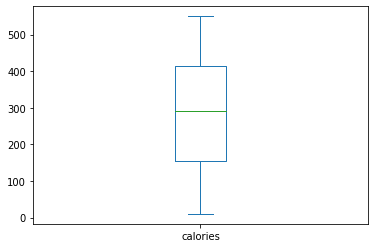

In [3]:
df.calories.plot.box()

The central green bar is the median, the other four bars are the minimum (no outliers here!), Q1, Q3, and the max.  An outlier would have been represented as a dot falling outside the whisker.

Let's get many boxplots with the `by` command

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


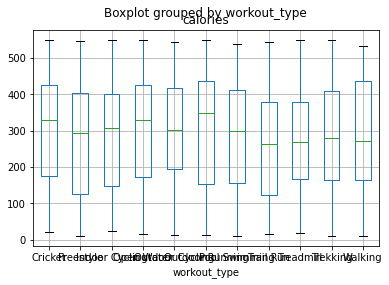

In [4]:
df.boxplot(column = 'calories',by = 'workout_type')

This is not a very great visualization as you cannot read the categories!  Rotating the angle by $45^\circ$ will do it.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


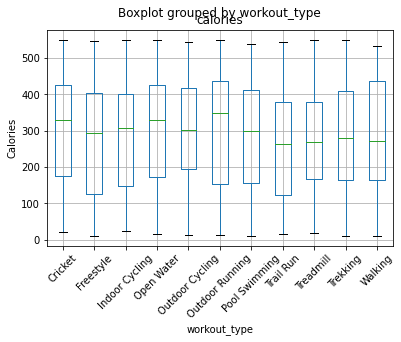

In [10]:
import matplotlib.pyplot as plt


ax = df.boxplot(column = 'calories',by = 'workout_type',rot = 45)
ax.set_ylabel('Calories')
plt.show()

A better option would be to rotate the graph and have the number of calories on the $x$ axis and the catagories on the $y$.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


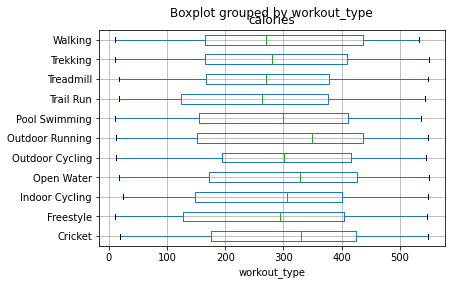

In [ ]:
df.boxplot(column = 'calories',by = 'workout_type',vert = False)

## Violin Plots

We'll repeat the graphics above with a violin plot.  I'll need to use a different tool to make it work.  Here I have choosen to use `matplotlib` it is actually what is running in the background of `pandas` to make all the other graphics we have done thus far.

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f673512f510>],
 'cbars': <matplotlib.collections.LineCollection at 0x7f673512f310>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f673512f390>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f673512f950>}

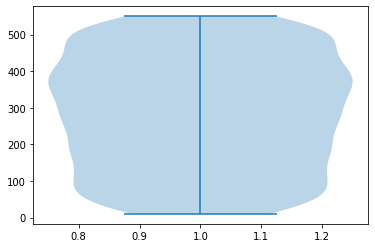

In [ ]:
import matplotlib.pyplot as plt

plt.violinplot(df.calories)

If I wanted multiple violins, I'd do the following with `seaborn`.

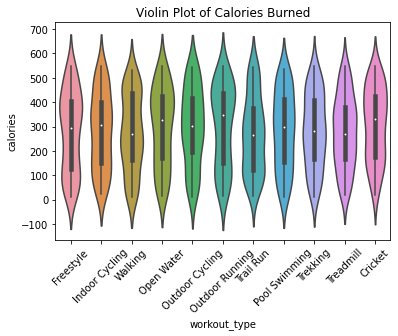

In [14]:
import seaborn as sns

ax = sns.violinplot(data = df, x = 'workout_type', y = 'calories')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax.set_title('Violin Plot of Calories Burned')
plt.show()

What if we wanted just 'Trekking'

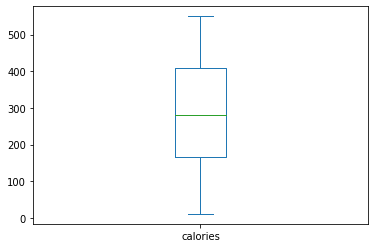

In [27]:
df.query("workout_type == 'Trekking'").calories.plot.box()

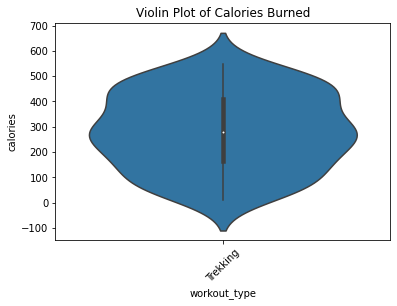

In [30]:
ax = sns.violinplot(data = df.query("workout_type == 'Trekking'"), x = 'workout_type', y = 'calories')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax.set_title('Violin Plot of Calories Burned')
plt.show()

To change the direction, swap $x$ and $y$

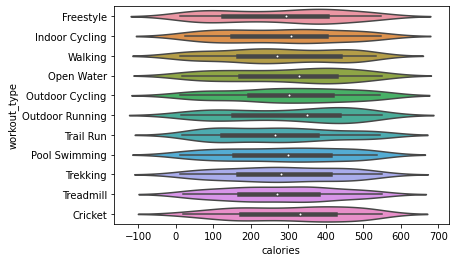

In [ ]:
sns.violinplot(data = df, y = 'workout_type', x = 'calories')

The colors mean different sports but that seems redundant to me.  I also added the points with some 'jittering', called `stripplot` in seaborn.

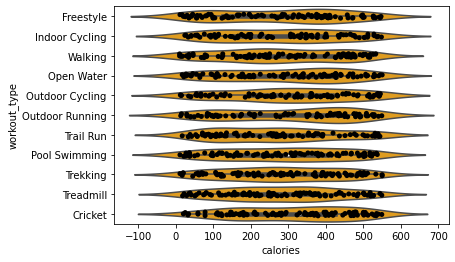

In [34]:
sns.violinplot(data = df, y = 'workout_type', x = 'calories', color = 'orange')
sns.stripplot(data = df, y = 'workout_type', x = 'calories' , color = 'black')

In [48]:
rgb= [255,78,0]
rgbscaled = []
for color in rgb:
  rgbscaled.append(color/255)
rgbscaled

[1.0, 0.3058823529411765, 0.0]

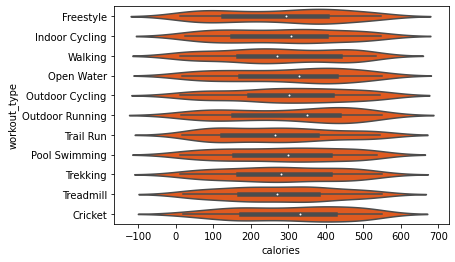

In [49]:
sns.violinplot(data = df, y = 'workout_type', x = 'calories', color = rgbscaled)

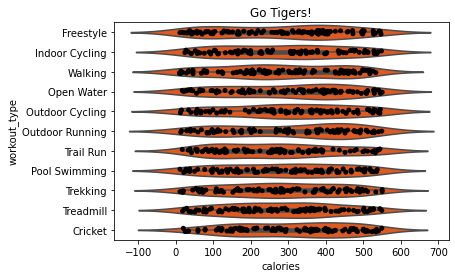

In [54]:
hexcolor = "#FF4E00"

ax = sns.violinplot(data = df, y = 'workout_type', x = 'calories', color = hexcolor)
sns.stripplot(data = df, y = 'workout_type', x = 'calories' , color = '#000000')

ax.set_title('Go Tigers!')
plt.show()

## Your Turn

Recreate the three boxplots in this lecture using `seaborn`.  Add the jittered points to the final boxplot.